<a href="https://colab.research.google.com/github/yokabicarpmaz/ME462_ControlSystemsTools/blob/master/Frequency_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FREQUENCY RESPONSE**

Let's start with adding necessary libraries !


Do NOT forget to run codes in order !

In [ ]:
try :
  !pip install control
  !pip install cowsay
  import control as cnt
  from control import bode_plot
  import matplotlib.pyplot as plt
  from mpl_toolkits import mplot3d
  import numpy as np
  import sympy as sy
  import math
  import cowsay
  import ipywidgets as widgets
  from IPython.display import display
  cowsay.stegosaurus("All libraries have been successfully downloaded!")
except : 
   print("\033[1m"+"WARNING!!!LIBRARIES COULD NOT BE DOWNLOADED. PLEASE TRY AGAIN !"+"\033[0m")

  ________________________________________________
< All libraries have been successfully downloaded! >
                                                     \
                                                      \
                                                       \
                                                        \                                                                 
                                                                                  / `.   .' " 
                                                                          .---.  <    > <    >  .---.
                                                                          |    \  \ - ~ ~ - /  /    |
                                                      _____          ..-~             ~-..-~
                                                     |     |   \~~~\.'                    `./~~~/
                                                    ---------   \__/                        \__/
                  

  While the output of a system can be represented in time domain, it can also be represented in the frequency domain.

  This approach can be useful for system identification. If a controller is to be designed for a very complicated or unknown system, measuring the frequency response of the system can yield a model of the system. Then, only by using the frequency response, a proper controller can be designed.

  If a system is stable, linear, and time invarient, for a sinusoidal input, the steady state output is a sinusoidal with the same frequency. However, the steady state output may have a different phase and a different magnitude.

  Let's assume the input is given as
$x(t) = A_x\sin({\omega}t + {\alpha})h(t)$, where h(t) is the unit step function

  Then, the expected steady state system output is $y_{ss}(t) = A_y\sin({\omega}t + {\alpha} + {\phi})$

  For this system, at frequency ${\omega}$, the following properties can be defined:
- Amplitude ratio (magnification factor) $= M = \frac{A_y}{A_x}$
- Phase lead $= {\phi}$
- Phase lag $= -{\phi}$

  In order to find these properties as a function of ${\omega}$, one can insert $j{\omega}$ instead of s in the systems transfer function. The magnitude of the resultant function is equal to amplitude ratio, and the phase of the resultant function is equal to phase lead.

One way to visualize these properties is bode diagrams. A bode diagram consists of two graphs containing frequency(${\omega}$) versus $\overline{M} = 20\log(M)$, and ${\phi}$. In the bode diagrams, ${\omega}$ is shown in log scale. $\overline{M}$ is the magnitude in decibels (dB). A decade is an interval in which ${\omega}$ is multiplied by a factor of 10.


Now let's go over some common transfer functions, and see their bode plots.
We can start by considering the simplest case: a **constant transfer function**.

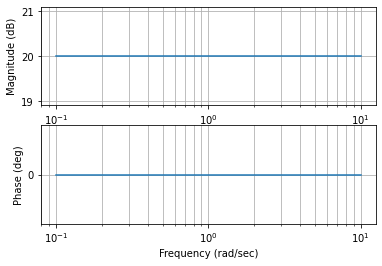

In [ ]:
K = 10
system_tf = cnt.tf([K], [1])   #Transfer function of the system
b_magnitude, b_phase, b_freq = bode_plot([system_tf], dB = True)


As you might expect, and the plot suggests, the constant term has a finite $\overline{M}$, and a phase of 0.

Now, let's consider a slightly more complicated function, a **differentiator** (s):

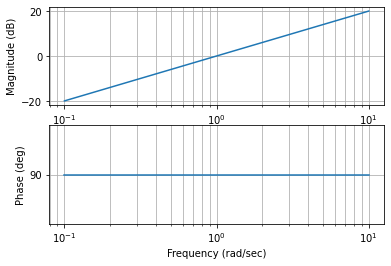

In [ ]:
system_tf = cnt.tf([1, 0], [1])   #Transfer function of the system
b_magnitude, b_phase, b_freq = bode_plot([system_tf], dB = True)

Let's verify the result.
$$G(s) = s\\
G(j{\omega}) = j{\omega}\\
M = |G(j{\omega})| = {\omega}\\
{\phi} = \angle{G(j{\omega})} = 90°\\
\overline{M} = 20\log({\omega})$$

Considering that ${\omega}$ is in log scale, we can verify that $\overline{M}$ is a line with a slope of 20dB/dec, and ${\phi}$ is 90°.

Before moving on to the next example, it could be useful to think about how the bode plot of the inverse of a transfer function is related to the bode plot of itself.

Since $G(j{\omega})$ is a complex number, we can represent it with polar coordinates.

$$G(j{\omega}) = Me^{j{\phi}}\\
|G(j{\omega})| = M\\
\overline{M}^{\prime} = 20\log(M)\\
\angle{{G(j{\omega})}} = {\phi}\\
\frac{1}{G(j{\omega})} = \frac{e^{-j{\phi}}}{M}\\
|\frac{1}{G(j{\omega})}| = \frac{1}{M}\\
20\log(\frac{1}{M}) = -\overline{M}^{\prime}\\
\angle{\frac{1}{G(j{\omega})}} = -{\phi}
$$

To conclude, when a transfer function is inversed, both characteristics in its bode plot get multiplied by -1. Keeping that in mind, sketch the bode plot of an integrator (1/s).

Try to skecth the bode plot for an integrator, and verify your results by using control toolbox.

Let's consider the bode plot for a **first order system** with no numerator dynamics.

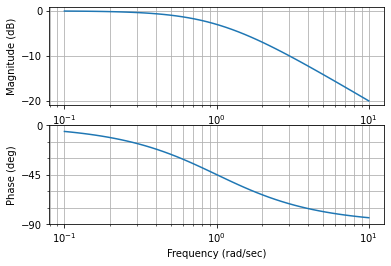

In [ ]:
T = 1
system_tf = cnt.tf([1], [T, 1])   #Transfer function of the system
b_magnitude, b_phase, b_freq = bode_plot([system_tf], dB = True)


Before moving on to the next example, it can be useful to think about how one could create the body plot of a transfer function which is the multiplication of two other transfer functions.

Let $\overline{M}_1$, $\overline{M}_2$ be the magnitude characteristics (in dB), $M_1$, $M_2$ be the magnitude characteristics, ${\phi}_1$,  and ${\phi}_2$ be the phase lead characteristics of transfer functions $G_1(s)$ and $G_2(s)$ successively.

$$ G_3(j{\omega}) = G_1(j{\omega}) * G_2(j{\omega}) = M_1*M_2e^{{\phi}_1 + {\phi}_2}\\
\overline{M}_3 = 20\log(|G_3(j{\omega})|) = 20\log(M_1*M_2) = \overline{M}_1 + \overline{M}_2\\
{\phi}_3 = \angle{G_3(j{\omega})} = {\phi}_1 + {\phi}_2\\
$$

To conclude, when two transfer functions are multiplied their bode plot characteristics get summed.

Using this property, try to sketch the bode plot of an **overdamped second order system**. Now, let's see what the bode diagram of an underdamped second order system looks like.





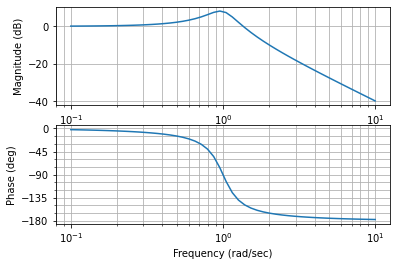

In [ ]:
w_n = 1 # Natural frequency
ksi = 0.2 # Damping ratio
system_tf = cnt.tf([w_n**2], [1, 2*ksi*w_n, w_n**2])   #Transfer function of the system
b_magnitude, b_phase, b_freq = bode_plot([system_tf], dB = True)

As one would expect from a second order underdamped system, maximum magnitude response exists at a specific frequency.

A random bode plot generator is given below for practice. You can try to guess the tranform functions of the given plots. The given system will be composed of first order systems for simplicity. (The systems will not have complex poles or zeros.)

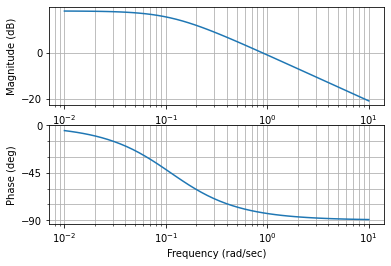

In [ ]:
def create_random_tf():
  # Number of subsystems are decided randomly by type
  NUMBER_OF_NUM_FIRST_ORDERS = np.random.randint(1)
  NUMBER_OF_DEN_FIRST_ORDERS = np.random.randint(2) + 1
  NUMBER_OF_INTEGRATORS = np.random.randint(5)-2
  MULTIPLIER = np.random.randint(10) + 1

  MAX_VALUE_OF_T = 10

  tf = cnt.tf([MULTIPLIER], [1])
  s = cnt.tf([1, 0], [1])

  # Subsystems are added one by one
  integrator_differentiator = s if NUMBER_OF_INTEGRATORS > 0 else 1/s
  for integrator in range(NUMBER_OF_INTEGRATORS):
    tf *= integrator_differentiator

  numerator_Ts = []
  for first_order in range(NUMBER_OF_NUM_FIRST_ORDERS):
    T = np.random.randint(MAX_VALUE_OF_T)
    numerator_Ts.append(T)
    tf *= cnt.tf([T, 1], [1])

  for first_order in range(NUMBER_OF_DEN_FIRST_ORDERS):
    T = np.random.randint(MAX_VALUE_OF_T)
    while T in numerator_Ts:
      T = np.random.randint(MAX_VALUE_OF_T)
    tf *= cnt.tf([1], [T, 1])

  return tf

def plot_random_tf():
  random_tf = create_random_tf()
  b_magnitude, b_phase, b_freq = bode_plot([random_tf], dB = True)
  return random_tf

answer = plot_random_tf()

To verify your guess, you can run the following code block.

In [ ]:
print(answer)


   8
-------
9 s + 1

